In [141]:
import pandas as pd
import plotly 
import numpy as np
import plotly.figure_factory as ff
import scipy
import plotly.graph_objects as go
import dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import plot
import random

#pip install scipy
#!pip install Dash

In [142]:
# Import data

data = pd.read_csv('chocolate.csv')
continent = pd.read_csv('countryContinent.csv',encoding = "ISO-8859-1")
imp_exp=pd.read_csv('UNdata_Export_20220301_151116452.csv')
coord=pd.read_csv('country_points.csv',encoding = "ISO-8859-1")

path_datasets = 'https://raw.githubusercontent.com/nalpalhao/DV_Practival/master/datasets/'
geo_path = path_datasets + 'Lesson_4/'

import urllib.request, json 

with urllib.request.urlopen(geo_path + 'countries.geojson') as url:
    data_geo = json.loads(url.read().decode())


In [143]:
coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [144]:
continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [145]:
imp_exp.head()

,Table Code,Country or Area Code,Country or Area,Year,Comm. Code,Commodity,Flow Code,Flow,Trade (USD),Weight (kg),Quantity Code,Quantity Name,Quantity
0,19,4,Afghanistan,2018,180500,"Cocoa powder, unsweetened",1,Import,7.247329e+04,8.070000e+04,8,Weight in kilograms,8.070000e+04
1,19,4,Afghanistan,2018,180690,Chocolate/cocoa food preparations nes,1,Import,3.281740e+07,5.662823e+06,8,Weight in kilograms,5.662823e+06
2,19,4,Afghanistan,2018,180690,Chocolate/cocoa food preparations nes,2,Export,4.327404e+06,0.000000e+00,8,Weight in kilograms,6.239175e+06
3,19,4,Afghanistan,2018,180690,Chocolate/cocoa food preparations nes,3,Re-Export,7.452492e+04,0.000000e+00,8,Weight in kilograms,0.000000e+00
4,19,4,Afghanistan,2016,180690,Chocolate/cocoa food preparations nes,1,Import,1.568728e+08,2.677301e+07,8,Weight in kilograms,2.677301e+07


In [146]:
imp_exp=imp_exp[imp_exp['Commodity']=='Cocoa beans, whole or broken, raw or roasted'][['Country or Area','Year','Commodity','Flow','Quantity','Trade (USD)']]
imp_exp.head()

,Country or Area,Year,Commodity,Flow,Quantity,Trade (USD)
60,Albania,2012,"Cocoa beans, whole or broken, raw or roasted",Import,130.0,874.0
71,Albania,2011,"Cocoa beans, whole or broken, raw or roasted",Import,4524.0,19877.0
83,Albania,2010,"Cocoa beans, whole or broken, raw or roasted",Import,45.0,295.0
94,Albania,2009,"Cocoa beans, whole or broken, raw or roasted",Import,262.0,1919.0
149,Albania,2004,"Cocoa beans, whole or broken, raw or roasted",Import,1606.0,2729.0


In [147]:
# Prepare the data for the merge
data["company_location"] = data["company_location"].str.title()
data["country_of_bean_origin"] = data["country_of_bean_origin"].str.title()
data["company_location"].replace({'U.S.A': 'United States of America','U.K.':'United Kingdom of Great Britain and Northern Ireland','Dominican republic':'Dominican Republic','El salvador':'El Salvador','Vietnam':'Viet Nam','Venezuela':'Venezuela (Bolivarian Republic of)','South Korea':'Korea (Republic of)','New Zealand':'New Zealand','Russia':'Russian Federation','Taiwan':'Taiwan, Province of China','Sao Tome':'Sao Tome and Principe','Sao Tome & Principe':'Sao Tome and Principe','St. Lucia':'Saint Lucia','U.A.E.':'United Arab Emirates','St.Vincent-Grenadines':'Saint Vincent and the Grenadines','Bolivia':'Bolivia (Plurinational State of)'}, inplace=True)
data["country_of_bean_origin"].replace({'U.S.A': 'United States of America','U.K.':'United Kingdom of Great Britain and Northern Ireland','Dominican republic':'Dominican Republic','El salvador':'El Salvador','Vietnam':'Viet Nam','Venezuela':'Venezuela (Bolivarian Republic of)','South Korea':'Korea (Republic of)','New Zealand':'New Zealand','Russia':'Russian Federation','Taiwan':'Taiwan, Province of China','Sao Tome':'Sao Tome and Principe','Sao Tome & Principe':'Sao Tome and Principe','St. Lucia':'Saint Lucia','U.A.E.':'United Arab Emirates','St.Vincent-Grenadines':'Saint Vincent and the Grenadines','Bolivia':'Bolivia (Plurinational State of)','Burma':'Myanmar','Tanzania':'Tanzania, United Republic of','Trinidad':'Trinidad and Tobago','Dr Congo':'Congo (Democratic Republic of the)'}, inplace=True)

In [148]:
# removing Unnamed:0
data=data.iloc[:,1:]

In [149]:
teste=data.merge(continent[['country','continent','sub_region','code_2']].rename(columns={'continent':'company_continent','sub_region':'company_region','code_2':'company_code_2'}), left_on='company_location', right_on='country', how='left')

In [150]:
teste[teste['company_continent'].isna()]['company_location'].value_counts

<bound method IndexOpsMixin.value_counts of 193        Wales
486     Scotland
487     Scotland
488     Scotland
489     Scotland
490     Scotland
491     Scotland
1083    Scotland
1084    Scotland
1513    Scotland
1514    Scotland
Name: company_location, dtype: object>

In [151]:
teste=teste[teste['company_location']!= 'Scotland']

In [152]:
teste=teste.merge(continent[['country','continent','sub_region','code_2']].rename(columns={'continent':'bean_continent','sub_region':'bean_region','code_2':'bean_code_2'}), left_on='country_of_bean_origin', right_on='country', how='left')

In [153]:
teste[teste['bean_continent'].isna()]['country_of_bean_origin'].value_counts

<bound method IndexOpsMixin.value_counts of 88      Blend
92      Blend
96      Blend
100     Blend
177     Blend
        ...  
2188    Blend
2201    Blend
2203    Blend
2209    Blend
2213    Blend
Name: country_of_bean_origin, Length: 177, dtype: object>

In [154]:
teste=teste[teste['country_of_bean_origin']!= 'Blend']

In [155]:
data=teste

In [156]:
data.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'country_x', 'company_continent', 'company_region',
       'company_code_2', 'country_y', 'bean_continent', 'bean_region',
       'bean_code_2'],
      dtype='object')

In [157]:
# Add the coordinates both for bean_origin and company_location
coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [158]:
teste1=data.merge(coord.iloc[:,:-1], left_on='bean_code_2', right_on='country', how='left').rename(columns={'latitude':'bean_lat','longitude':'bean_lon'})
teste2=data.merge(coord.iloc[:,:-1], left_on='company_code_2', right_on='country', how='left').rename(columns={'latitude':'country_lat','longitude':'country_lon'})

In [159]:
data1=data.groupby(by=['company']).mean()
data1

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
company,,,,,
5150,2455.333333,2019.000000,76.000000,3.500000,3.000000
A. Morin,1294.480000,2013.960000,68.880000,3.400000,3.960000
AMMA,670.600000,2010.600000,69.000000,3.500000,4.000000
Acalli,1966.000000,2017.500000,71.000000,3.562500,2.000000
Adi aka Fijiana (Easy In Ltd),705.000000,2011.000000,75.000000,3.250000,3.000000
...,...,...,...,...,...
Zotter,1033.705882,2012.647059,70.352941,3.352941,3.823529
hello cocoa,1460.000000,2015.000000,65.500000,3.125000,3.000000
hexx,1848.000000,2016.500000,71.500000,2.925000,2.000000


In [160]:
imp_exp_regions = imp_exp.merge(continent[['country','continent','sub_region','code_2']].rename(columns={'sub_region':'region'}), left_on = 'Country or Area', right_on= 'country', how= 'left')

### ------------- BEA


In [161]:
imp_exp_regions.loc[(imp_exp_regions['continent']=='nan') & (imp_exp_regions['Country or Area']!='nan')]

,Country or Area,Year,Commodity,Flow,Quantity,Trade (USD),country,continent,region,code_2


In [162]:
imp_exp_regions['country'].isna().sum()

648

In [163]:
imp_exp_regions['continent'].isna().sum()
#imp_exp_regions[imp_exp_regions['Quantity'].isna()==True]

648

In [164]:
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Flow'] == 'Re-Export')]
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Flow'] == 'Re-Import')]

In [165]:
imp_exp_regions["Quantity"]= imp_exp_regions["Quantity"].fillna(imp_exp_regions.groupby('Country or Area')['Quantity'].transform('mean'))

imp_exp_regions['Quantity'].astype(int)

0         130
1        4524
2          45
3         262
4        1606
        ...  
5053       79
5054      221
5055      934
5056    14942
5057        9
Name: Quantity, Length: 4898, dtype: int32

In [166]:
imp_exp_regions=imp_exp_regions[imp_exp_regions['Country or Area'].isnull()!= True] #removing nulls from Country or Area Column


In [167]:
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Wallis and Futuna Isds', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Wallis and Futuna Isds','region'] = 'Polynesia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Venezuela', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Venezuela','region'] = 'Southern America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Rep. of Tanzania', 'continent'] = 'Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Rep. of Tanzania','region'] = 'Eastern Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Rep. of Tanzania','country'] = 'Tanzania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Kingdom', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Kingdom','region'] = 'Northern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'USA', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'USA','region'] = 'Northern America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'USA','country'] = 'United States of America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Turks and Caicos Isds', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Turks and Caicos Isds','region'] = 'Central America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'TFYR of Macedonia', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'TFYR of Macedonia','region'] = 'Southern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'TFYR of Macedonia','country'] = 'Macedonia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Syria', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Syria','region'] = 'Western Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Solomon Isds', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Solomon Isds','region'] = 'Australia and New Zealand'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Serbia and Montenegro', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Serbia and Montenegro','region'] = 'Southern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Moldova', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Moldova','region'] = 'Eastern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Moldova','country'] = 'Moldova'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Korea', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Korea','region'] = 'Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Korea','country'] = 'South Korea'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Other Asia, nes', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Other Asia, nes','region'] = 'Other'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Neth. Antilles', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Neth. Antilles','region'] = 'Caribbean'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Lao People\'s Dem. Rep.', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Lao People\'s Dem. Rep.','region'] = 'South-Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Lao People\'s Dem. Rep.','country'] = 'Laos'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Iran', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Iran','region'] = 'South-Western Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Fed. Rep. of Germany', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Fed. Rep. of Germany','region'] = 'Central Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Fed. Rep. of Germany','country'] = 'Germany'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Faeroe Isds', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Faeroe Isds', 'region'] = 'Northern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'FS Micronesia', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'FS Micronesia', 'region'] = 'Micronesia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Czech Rep.', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Czech Rep.', 'region'] = 'Central Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Bosnia Herzegovina', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Bosnia Herzegovina', 'region'] = 'Southern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Central African Rep.', 'continent'] = 'Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Central African Rep.', 'region'] = 'Middle Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Hong Kong SAR', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Hong Kong SAR', 'region'] = 'Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Macao SAR', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Macao SAR', 'region'] = 'Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Cook Isds', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Cook Isds', 'region'] = 'Polynesia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Dominican Rep.', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Dominican Rep.', 'region'] = 'Caribbean'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Sudan', 'continent'] = 'Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Sudan','region'] = 'Northern Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Sudan','country'] = 'Sudan'

imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'Belgium-Luxembourg')]

imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'EU-28')]
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'So. African Customs Union')]
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'China, Hong Kong SAR')]


In [168]:
flows_df=imp_exp_regions.drop(columns=['country', 'code_2'])

In [169]:
#convert data type and sort the data by Year
flows_df=flows_df.sort_values(by=['Year'])

In [170]:
flows_df=flows_df.dropna(how='any')

In [171]:
groupby_flows=flows_df.groupby(['Year','continent', 'region', 'Country or Area', 'Flow']).mean(['Trade (USD)','Quantity'])
groupby_flows.reset_index(inplace=True)
groupby_flows

,Year,continent,region,Country or Area,Flow,Quantity,Trade (USD)
0,1988,Americas,Caribbean,Haiti,Export,2.720937e+06,3.995150e+06
1,1988,Asia,Eastern Asia,Japan,Import,4.097251e+07,8.498128e+07
2,1988,Asia,Eastern Asia,Rep. of Korea,Import,1.978812e+06,4.450443e+06
3,1988,Europe,Central Europe,Fmr Fed. Rep. of Germany,Export,1.824422e+06,3.625000e+06
4,1988,Europe,Central Europe,Fmr Fed. Rep. of Germany,Import,2.223116e+08,4.471900e+08
...,...,...,...,...,...,...,...
4801,2019,Europe,Southern Europe,Greece,Import,3.279127e+06,8.264908e+06
4802,2019,Europe,Southern Europe,TFYR of Macedonia,Export,3.000000e+00,4.538000e+01
4803,2019,Europe,Southern Europe,TFYR of Macedonia,Import,4.660000e+02,4.885310e+03
4804,2019,Europe,Western Europe,Switzerland,Export,3.428100e+05,1.724814e+06


In [172]:
groupby_flows=groupby_flows[groupby_flows['Year']!=1988]
groupby_flows=groupby_flows[groupby_flows['Year']!=1989]
groupby_flows=groupby_flows[groupby_flows['Year']!=1990]
#delete years until all continents have value for exports and imports

flows_df=flows_df[flows_df['Year']!=1988]
flows_df=flows_df[flows_df['Year']!=1989]
flows_df=flows_df[flows_df['Year']!=1990]

In [173]:
africa_count= len(flows_df.groupby('continent')['Country or Area'].unique()[0])
americas_count= len(flows_df.groupby('continent')['Country or Area'].unique()[1])
asia_count= len(flows_df.groupby('continent')['Country or Area'].unique()[2])
europe_count= len(flows_df.groupby('continent')['Country or Area'].unique()[3])
oceania_count= len(flows_df.groupby('continent')['Country or Area'].unique()[4])

print('Africa has: ' + str(africa_count) + ' countries')
print('Americas has: ' + str(americas_count) + ' countries')
print('Asia has: ' + str(asia_count) + ' countries')
print('Europe has: ' + str(europe_count) + ' countries')
print('Oceania has: ' + str(oceania_count) + ' countries')

Africa has: 49 countries
Americas has: 43 countries
Asia has: 44 countries
Europe has: 42 countries
Oceania has: 15 countries


In [174]:
nr_countries = [['Africa', africa_count],
                ['Americas', americas_count], 
                ['Asia', asia_count],
                ['Europe', europe_count],
                ['Oceania', oceania_count]]

df_nr_countries = pd.DataFrame(nr_countries, columns = ['Continent', 'Nr of Countries'])
print(df_nr_countries)

  Continent  Nr of Countries
0    Africa               49
1  Americas               43
2      Asia               44
3    Europe               42
4   Oceania               15


In [175]:
groupby_flows= pd.merge(df_nr_countries, groupby_flows, left_on='Continent', right_on='continent')
groupby_flows.drop(columns='continent', inplace=True)
groupby_flows

,Continent,Nr of Countries,Year,region,Country or Area,Flow,Quantity,Trade (USD)
0,Africa,49,1991,Eastern Africa,Madagascar,Export,4272629.0,3.971947e+06
1,Africa,49,1991,Eastern Africa,Malawi,Import,101.0,2.920000e+02
2,Africa,49,1991,Northern Africa,Tunisia,Import,355500.0,5.718130e+05
3,Africa,49,1992,Eastern Africa,Kenya,Export,810.0,1.379000e+03
4,Africa,49,1992,Eastern Africa,Kenya,Import,342375.0,5.445820e+05
...,...,...,...,...,...,...,...,...
4717,Oceania,15,2018,Melanesia,Fiji,Export,8270.0,2.248422e+04
4718,Oceania,15,2018,Melanesia,Fiji,Import,528.0,3.499561e+03
4719,Oceania,15,2018,Micronesia,Palau,Import,4.5,5.595000e+01
4720,Oceania,15,2018,Polynesia,Samoa,Export,34976.6,2.608072e+05


In [176]:
#groupby_flows['Q_avg_pond']=groupby_flows.apply(lambda row: row['Quantity']/row['Nr of Countries'], axis=1)
#groupby_flows['T_avg_pond']=groupby_flows.apply(lambda row: row['Trade (USD)']/row['Nr of Countries'], axis=1)
#TO TEST VISUALIZATIONS WITH MEDIA PONDERADA - not used so far

In [177]:
groupby_flows = groupby_flows.sort_values('Year', ascending=True)

In [178]:
groupby_flows

,Continent,Nr of Countries,Year,region,Country or Area,Flow,Quantity,Trade (USD)
0,Africa,49,1991,Eastern Africa,Madagascar,Export,4.272629e+06,3.971947e+06
2989,Europe,42,1991,Western Europe,Germany,Import,3.029256e+08,4.028630e+08
2990,Europe,42,1991,Western Europe,Switzerland,Export,1.091840e+05,1.463250e+05
2991,Europe,42,1991,Western Europe,Switzerland,Import,1.981536e+07,3.095994e+07
1981,Asia,44,1991,Eastern Asia,"China, Macao SAR",Import,1.790000e+02,3.710000e+02
...,...,...,...,...,...,...,...,...
1978,Americas,43,2019,South America,Chile,Export,1.298480e+03,1.720731e+04
1977,Americas,43,2019,Northern America,Canada,Import,9.102900e+07,2.250315e+08
1976,Americas,43,2019,Northern America,Canada,Export,1.051203e+07,2.256409e+07
1974,Americas,43,2019,Central America,El Salvador,Export,4.133070e+03,2.499735e+04


In [179]:
#def scatter_flows(flow):
 #   fig = px.scatter(groupby_flows[groupby_flows['Flow']==flow],
  #               x='Quantity',
   #              y='Trade (USD)',
    #             animation_frame='Year', 
     #            animation_group='Continent', 
      #           size='Nr of Countries', 
       #          color='Continent',
        #         hover_name='Continent',
         #        )
    #fig.update_layout(
     #               title=('Quantity of Cacao ' + str(flow) + 'ed vs Trade (USD) by Continents in 1988 - 2019'),
      #              xaxis=dict(title=('Quantity '+ str(flow) + 'ed')),
       #             yaxis=dict(title=(str(flow) + ' Trade (USD) of Cacao')),
        #            #paper_bgcolor='rgb(500, 500, 500)'#,
         #           #plot_bgcolor='rgb(243, 243, 243)'
          #          )
                    
    #fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 3000
    #return fig.show()

In [180]:
#scatter_flows(flow='Export')

In [181]:
#scatter_flows(flow='Import')

In [182]:
#n_years= 2019-1988
#n_years

In [183]:
tree_flows_GB=groupby_flows.groupby(['Flow','Continent','region', 'Country or Area']).mean(['Quantity','Trade (USD)'])
tree_flows_GB.reset_index(inplace=True)
tree_flows_GB

,Flow,Continent,region,Country or Area,Nr of Countries,Year,Quantity,Trade (USD)
0,Export,Africa,Eastern Africa,Kenya,49.0,2004.857143,2.009929e+03,1.265276e+03
1,Export,Africa,Eastern Africa,Madagascar,49.0,2004.500000,5.113197e+06,9.890885e+06
2,Export,Africa,Eastern Africa,Malawi,49.0,2008.333333,3.991800e+05,3.096376e+06
3,Export,Africa,Eastern Africa,Mozambique,49.0,2003.000000,2.000000e+00,5.540000e+02
4,Export,Africa,Eastern Africa,Rwanda,49.0,2016.000000,2.675000e+03,7.440000e+03
...,...,...,...,...,...,...,...,...
335,Import,Oceania,Polynesia,Cook Isds,15.0,2008.000000,1.750000e+01,3.550000e+01
336,Import,Oceania,Polynesia,French Polynesia,15.0,2009.000000,8.308333e+01,8.285833e+02
337,Import,Oceania,Polynesia,Samoa,15.0,2011.222222,2.555556e+03,5.615024e+03
338,Import,Oceania,Polynesia,Tonga,15.0,2006.000000,1.051154e+03,2.947154e+03


In [184]:
def tree_flows(flow, variable, year):
    fig = px.treemap(groupby_flows[(groupby_flows['Flow']==flow) & (groupby_flows['Year']==year) ], 
                     path=['Country or Area'],
                     values=variable, color=variable, color_continuous_scale='sunset'
                    )
            
    return fig.show()

In [271]:
def tree_flows(flow, variable, year):
    fig = px.treemap(groupby_flows[(groupby_flows['Flow']==flow) & (groupby_flows['Year']==year) ], 
                     path=['Country or Area'],
                     values=variable, color=variable, color_continuous_scale='sunset', 
                     title=('Quantity of Cacao ' + str(flow) + 'ed by Country in ' + str(year))
                    )
    fig.data[0].hovertemplate = '%{label}<br>%{value}'
            
    return fig.show()



In [272]:
tree_flows(flow='Export', variable='Quantity', year=2010)

In [186]:
#nao sei se isto é mesmo necessario

tree_variables = [
                    {'label': 'Quantity', 'value': 'Quantity'},
                    {'label': 'Trade (USD)', 'value': 'Trade (USD)'}
                 ]

tree_flows_Dict = [
                    {'label': 'Export', 'value': 'Export'},
                    {'label': 'Import', 'value': 'Import'}
                 ]


# ----- Helena


In [187]:

ingredients = [
    {'label': 'Has Sugar', 'value': 'have_sugar'},
    {'label': 'Has not Sugar', 'value': 'have_not_sugar'},
    {'label': 'Has Vanilla', 'value': 'have_vanila'},
    {'label': 'Has not Vanilla', 'value': 'have_not_vanila'},
    {'label': 'Has Salt', 'value': 'have_salt'},
    {'label': 'Has not Salt', 'value': 'have_not_salt'},
    {'label': 'Has Lecithin', 'value': 'have_lecithin'},
    {'label': 'Has not Lecithin', 'value': 'have_not_lecithin'}
]


# ------- Filipa


### Column count_tastes


In [188]:
test_taste = data
test_taste.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,third_taste,fourth_taste,country_x,company_continent,company_region,company_code_2,country_y,bean_continent,bean_region,bean_code_2
0,2454,5150,United States of America,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,...,full body,NaN,United States of America,Americas,Northern America,US,Madagascar,Africa,Eastern Africa,MG
1,2458,5150,United States of America,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,...,savory,NaN,United States of America,Americas,Northern America,US,Dominican Republic,Americas,Caribbean,DO
2,2454,5150,United States of America,2019,"Tanzania, United Republic of","Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,...,bready,NaN,United States of America,Americas,Northern America,US,"Tanzania, United Republic of",Africa,Eastern Africa,TZ
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,...,roasty,NaN,France,Europe,Western Europe,FR,Peru,Americas,South America,PE
4,797,A. Morin,France,2012,Bolivia (Plurinational State of),Bolivia,70.0,3.50,4,have_bean,...,NaN,NaN,France,Europe,Western Europe,FR,Bolivia (Plurinational State of),Americas,South America,BO


In [189]:
test_taste['first_taste'].fillna(value = 0, inplace = True)
test_taste['second_taste'].fillna(value = 0, inplace = True)
test_taste['third_taste'].fillna(value = 0, inplace = True)
test_taste['fourth_taste'].fillna(value = 0, inplace = True)

In [190]:
#taste = lambda x: 1 if x.isna() == False else 0
taste = lambda x: 1 if x != 0 else x

In [191]:
test_taste['binFirst_taste'] = test_taste['first_taste'].apply(taste)
test_taste['binSecond_taste'] = test_taste['second_taste'].apply(taste)
test_taste['binThird_taste'] = test_taste['third_taste'].apply(taste)
test_taste['binFourth_taste'] = test_taste['fourth_taste'].apply(taste)

In [192]:
test_taste[test_taste['binThird_taste'] == 0].head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,company_region,company_code_2,country_y,bean_continent,bean_region,bean_code_2,binFirst_taste,binSecond_taste,binThird_taste,binFourth_taste
4,797,A. Morin,France,2012,Bolivia (Plurinational State of),Bolivia,70.0,3.50,4,have_bean,...,Western Europe,FR,Bolivia (Plurinational State of),Americas,South America,BO,1,1,0,0
9,1011,A. Morin,France,2013,Brazil,Brazil,70.0,3.25,4,have_bean,...,Western Europe,FR,Brazil,Americas,South America,BR,1,0,0,0
10,1015,A. Morin,France,2013,Papua New Guinea,Papua New Guinea,70.0,3.25,4,have_bean,...,Western Europe,FR,Papua New Guinea,Oceania,Melanesia,PG,1,1,0,0
15,1015,A. Morin,France,2013,Colombia,Colombie,70.0,2.75,4,have_bean,...,Western Europe,FR,Colombia,Americas,South America,CO,1,1,0,0
18,1315,A. Morin,France,2014,Cuba,Cuba,70.0,3.50,4,have_bean,...,Western Europe,FR,Cuba,Americas,Caribbean,CU,1,1,0,0


In [193]:
test_taste['count_tastes'] = test_taste['binFirst_taste'] + test_taste['binSecond_taste'] + test_taste['binThird_taste'] + test_taste['binFourth_taste']

In [194]:
test_taste.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,company_code_2,country_y,bean_continent,bean_region,bean_code_2,binFirst_taste,binSecond_taste,binThird_taste,binFourth_taste,count_tastes
0,2454,5150,United States of America,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,...,US,Madagascar,Africa,Eastern Africa,MG,1,1,1,0,3
1,2458,5150,United States of America,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,...,US,Dominican Republic,Americas,Caribbean,DO,1,1,1,0,3
2,2454,5150,United States of America,2019,"Tanzania, United Republic of","Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,...,US,"Tanzania, United Republic of",Africa,Eastern Africa,TZ,1,1,1,0,3
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,...,FR,Peru,Americas,South America,PE,1,1,1,0,3
4,797,A. Morin,France,2012,Bolivia (Plurinational State of),Bolivia,70.0,3.50,4,have_bean,...,FR,Bolivia (Plurinational State of),Americas,South America,BO,1,1,0,0,2


### Radar Plot


In [195]:
feat_radar = ['cocoa_percent', 'rating', 'counts_of_ingredients', 'count_tastes']

In [196]:
radar = pd.DataFrame(round(test_taste.groupby(by = 'company')[feat_radar].mean(),2))
radar['company_name'] = radar.index
radar.insert(0, 'cocoa_level', round((5 * radar['cocoa_percent']) / 100, 2))
radar.drop(columns = {'cocoa_percent'}, inplace = True)
radar

,cocoa_level,rating,counts_of_ingredients,count_tastes,company_name
company,,,,,
5150,3.80,3.50,3.00,3.00,5150
A. Morin,3.44,3.40,3.96,2.88,A. Morin
AMMA,3.45,3.50,4.00,3.40,AMMA
Acalli,3.55,3.56,2.00,2.75,Acalli
Adi aka Fijiana (Easy In Ltd),3.75,3.25,3.00,1.75,Adi aka Fijiana (Easy In Ltd)
...,...,...,...,...,...
Zotter,3.52,3.35,3.82,2.88,Zotter
hello cocoa,3.28,3.12,3.00,3.00,hello cocoa
hexx,3.58,2.92,2.00,2.90,hexx


In [197]:
feat_radar = ['cocoa_level', 'rating', 'counts_of_ingredients', 'count_tastes']

In [198]:
company1 = '5150'
company2 = 'A. Morin'

In [199]:
radar['company_name'].isin([company1, company2])

company
5150                              True
A. Morin                          True
AMMA                             False
Acalli                           False
Adi aka Fijiana (Easy In Ltd)    False
                                 ...  
Zotter                           False
hello cocoa                      False
hexx                             False
organicfair                      False
twenty-four blackbirds           False
Name: company_name, Length: 488, dtype: bool

In [200]:
company1_list = []

company1_df = pd.DataFrame(radar[radar['company_name'] == company1])
for i in range(len(radar.columns)-1):
    company1_list.append(radar[radar['company_name'] == company1].iloc[0,i])

company1_list

[3.8, 3.5, 3.0, 3.0]

In [201]:
company2_list = []

company2_df = pd.DataFrame(radar[radar['company_name'] == company2])
for i in range(len(radar.columns)-1):
    company2_list.append(radar[radar['company_name'] == company2].iloc[0,i])

company2_list

[3.44, 3.4, 3.96, 2.88]

In [202]:
feat_radar

['cocoa_level', 'rating', 'counts_of_ingredients', 'count_tastes']

In [203]:

fig = go.Figure(data=go.Scatterpolar(
        r=company1_list,
        theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
        fill='toself', 
        marker_color = 'rgb(205,102,29)',   
        opacity =1, 
        hoverinfo = "text" ,
        name = company1,
        text  = [company1_df.columns[i] + ' = ' + str(company1_df.iloc[0,i]) for i in range(len(company1_list))]
    ), layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'))
fig.add_trace(go.Scatterpolar(
        r=company2_list,
        theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
        fill='toself',
        marker_color = 'rgb(193,255,193)',
        hoverinfo = "text" ,
        name= company2,
        text  = [company2_df.columns[i] + ' = ' + str(company2_df.iloc[0,i]) for i in range(len(company2_list))]
        ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [204]:
companies = list(data['company'].unique())
#companies

### Radar plot - MatplotLib

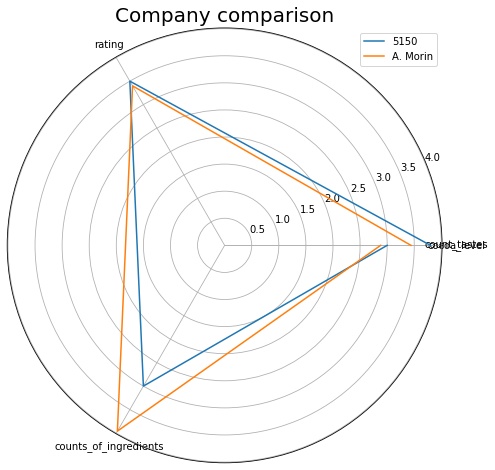

In [205]:
#categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(feat_radar))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, company1_list, label=company1)
plt.plot(label_loc, company2_list, label=company2)
plt.title('Company comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=feat_radar)
plt.legend()
plt.show()

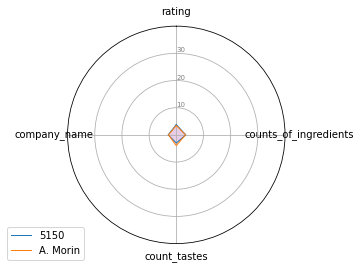

In [206]:
# number of variable
categories=list(radar)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# labels = [
#     range(0,101), range(0,6), range(0,11), 
#    range(0,5)]

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=radar.iloc[0].drop('company_name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=company1)
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar.iloc[1].drop('company_name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=company2)
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [207]:
radar.iloc[0]

cocoa_level               3.8
rating                    3.5
counts_of_ingredients       3
count_tastes                3
company_name             5150
Name: 5150, dtype: object

### Parallel Coordinates Plot


In [208]:
company1 = 'Ah Cacao'
company2 = 'Zotter'


In [209]:
data.company

0           5150
1           5150
2           5150
3       A. Morin
4       A. Morin
          ...   
2207      Zotter
2208      Zotter
2210      Zotter
2211      Zotter
2212      Zotter
Name: company, Length: 2074, dtype: object

In [210]:
parallel_coord = test_taste[test_taste['company'].isin([company1,company2])]

In [211]:
filter_company = lambda x: 1 if x == company1 else 2

In [212]:
parallel_coord['company_number'] = parallel_coord['company'].apply(filter_company)

In [213]:
parallel_coord.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,country_y,bean_continent,bean_region,bean_code_2,binFirst_taste,binSecond_taste,binThird_taste,binFourth_taste,count_tastes,company_number
42,316,Ah Cacao,Mexico,2009,Mexico,Tabasco,70.0,3.00,3,have_bean,...,Mexico,Americas,Central America,MX,1,1,1,0,3,1
2193,486,Zotter,Austria,2010,Brazil,"Brazil, Mitzi Blue",65.0,3.00,4,have_bean,...,Brazil,Americas,South America,BR,1,1,0,0,2,2
2194,647,Zotter,Austria,2011,Peru,Peru,70.0,3.75,4,have_bean,...,Peru,Americas,South America,PE,1,1,1,0,3,2
2195,749,Zotter,Austria,2011,India,Kerala State,65.0,3.50,4,have_bean,...,India,Asia,Southern Asia,IN,1,1,1,0,3,2
2196,781,Zotter,Austria,2011,India,Kerala State,62.0,3.25,4,have_bean,...,India,Asia,Southern Asia,IN,1,1,1,1,4,2


### Scatter Plot

In [214]:
scatter = px.scatter(parallel_coord, x="count_tastes", y="counts_of_ingredients", color="cocoa_percent", 
                 symbol = 'company_number', size='rating', hover_data=['company'])

scatter.show()

In [215]:
scatter2 = px.scatter(parallel_coord, x="count_tastes", y="counts_of_ingredients", color="cocoa_percent", 
                 facet_col = 'company_number', size='rating', hover_data=['company'])

scatter2.show()

In [216]:
scatter3 = px.scatter(parallel_coord, x="rating", y="cocoa_percent", color="counts_of_ingredients", 
                 symbol = 'company_number', size='count_tastes', hover_data=['company'])


scatter.update_layout(
    coloraxis_colorbar=dict(
    title="Count of ingredients",
    lenmode="pixels", len=100
))

scatter3.show()

MAP

In [217]:
data_company=data.groupby(by=["company_location"]).agg({"rating":"mean","ref":"count"})
data_company.reset_index(inplace=True)
data_origin=data.groupby(by=['country_of_bean_origin']).agg({"rating":"mean","ref":"count"})
data_origin.reset_index(inplace=True)

for feature in data_geo['features']:
    feature['id'] = feature['properties']['ADMIN']

i=0
pays=[]
while i<=254:
    pays.append(data_geo['features'][i]['id'])
    i+=1

data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Venezuela (Bolivarian Republic of)", "Venezuela", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Tanzania, United Republic of", "United Republic of Tanzania", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Bolivia (Plurinational State of)", "Bolivia", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Bolvia", "Bolivia", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "U.S.A.", "United States of America", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Taiwan, Province of China", "Taiwan", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Martinique", "France", data_origin["country_of_bean_origin"]) #colónia francesa
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Sulawesi", "Indonesia", data_origin["country_of_bean_origin"]) #parte da indonésia
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Principe", "Sao Tome and Principe", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Sumatra", "Indonesia", data_origin["country_of_bean_origin"]) #parte da indonésia
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Tobago", "Trinidad and Tobago", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Congo (Democratic Republic of the)", "Democratic Republic of the Congo", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Congo", "Republic of Congo", data_origin["country_of_bean_origin"])
data_origin["country_of_bean_origin"] = np.where(data_origin["country_of_bean_origin"] == "Viet Nam", "Vietnam", data_origin["country_of_bean_origin"])

data_company["company_location"] = np.where(data_company["company_location"] == "United Kingdom of Great Britain and Northern Ireland", "United Kingdom", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Venezuela (Bolivarian Republic of)", "Venezuela", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Wales", "United Kingdom", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Bolivia (Plurinational State of)", "Bolivia", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Russian Federation", "Russia", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Martinique", "France", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Taiwan, Province of China", "Taiwan", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Korea (Republic of)", "South Korea", data_company["company_location"])
data_company["company_location"] = np.where(data_company["company_location"] == "Viet Nam", "Vietnam", data_company["company_location"])

data_company.rename(columns={'company_location': 'country'}, inplace=True)
data_origin.rename(columns={'country_of_bean_origin': 'country'}, inplace=True)


# -------------------APP------------------

In [276]:
app = dash.Dash(__name__)

server = app.server

app.layout = html.Div([


                        html.Div([
                                html.H1('TITLE'),
                            ], id='title_id'),
                                            
                        html.Div([ 
                                #WORLD MAP
                                html.Div([ 
                                            #FILTROS
                                            html.Div([ 
                                                        html.H4("Choose what you want to see in this map"),
                                                        html.Div([
                                                                html.Div([
                                                                        dcc.RadioItems(
                                                                                id="country_radio",
                                                                                options=[dict(label="Bean origin", value="country_of_bean_origin"), dict(label="Company location", value="company_location")],
                                                                                value="country_of_bean_origin"
                                                                                ),
                                                                        ]),
                                                                html.Div([
                                                                        dcc.RadioItems(
                                                                                id="number_radio",
                                                                                options=[dict(label="Ratings", value="rating"),dict(label="Frequency",value="ref")],
                                                                                value="rating"
                                                                                ),
                                                                        ]),
                                                                ]),
                                                                ]) ,
                                    
                                            # VIS WORLD
                                            html.Div([ 
                                                    dcc.Graph(id="choroplethmapbox")
                                                ]),
                                            
                                        ], id='world_view', style={'display': 'flex'}),      
                                #RADAR
                                html.Div([ 
                                        #FILTROS
                                        html.Div([ html.Label('Company 1'),
                                                dcc.Dropdown(
                                                        id='drop_comp1_id',
                                                        options=companies,
                                                        value='5150',
                                                        multi=False
                                                        ),
                                                        ],className='box', style={'width': '20%','margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'}) ,
                                    
                                        
                                        # VIS RADAR
                                        html.Div([ 
                                                dcc.Graph(id='radar'),],className='box', style={'width': '60%','padding-bottom': '0px'}) ,
                                        # FILTRO3
                                        html.Div([ 
                                        
                                                html.Label('Company 2'),
                                                dcc.Dropdown(
                                                        id='drop_comp2_id',
                                                        options=companies,
                                                        value='A. Morin',
                                                        multi=False
                                                        ),
                                                        ],className='box', style={'width': '20%','margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'}) ,
                                        
                                        ], id='radar_view', style={'display': 'flex','width': '100%'}),
                                
                                #---------------------
                                #WORD CLOUD
                                html.Div([ 
                                
                                        html.Div([ 
                                                
                                                #FILTROS
                                                html.Div([ 
                                                          html.Label('CHOSE CHOCOLATE'),
                                                          html.Br(),
                                                html.Div([ 
                                                        
                                                        dcc.Dropdown(
                                                                id='drop_id',
                                                                options=ingredients,
                                                                value=['have_sugar'],
                                                                multi=True
                                                                ),
                                                                        ], className='box', style={'margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'}),
                                                html.Div([ 
                                                        html.Label('Cocoa Percentage'),
                                                        dcc.RangeSlider(
                                                                        id='percent_id',
                                                                        min=42,
                                                                        max=100,
                                                                        value=[70, 80],
                                                                        marks={'50': '50',
                                                                                '60': '60',
                                                                                '70': '70',
                                                                                '80': '80',
                                                                                '90': '90',
                                                                                '100': '100'},
                                                                        step=1
                                                                        )
        
                                                        ]) ,
                                                        html.Div([
                                                        html.H4('Company', style={'font-weight':'normal'}),
                                                        html.H3(id="name_company_id")
                                                        ],className='box_ing'),
                                                        
                                                        html.Div([
                                                        html.H4('Rating', style={'font-weight':'normal'}),
                                                        html.H3(id="rating_id")],className='box_ing'),
                                
                                                        html.Div([
                                                        html.H4('Country', style={'font-weight':'normal'}),
                                                        html.H3(id="country_id"),
                                                        ],className='box_ing'),
                                                 ],style={'width': '50%'}) ,
                                    
                                        # VIS WORD
                                         
                                                html.Div([ 
                                                        dcc.Graph(id='graph1'),
                                                ]) ,
                                                
                                        # BOXES OF INFO
                                                # html.Div([ 
                                                #         html.Div([
                                                #         html.H4('Company', style={'font-weight':'normal'}),
                                                #         html.H3(id="name_company_id")
                                                #         ],className='box_ing'),
                                                        
                                                #         html.Div([
                                                #         html.H4('Rating', style={'font-weight':'normal'}),
                                                #         html.H3(id="rating_id")],className='box_ing'),
                                
                                                #         html.Div([
                                                #         html.H4('Country', style={'font-weight':'normal'}),
                                                #         html.H3(id="country_id"),
                                                #         ],className='box_ing'),
                                                                
                                                #         ]) ,
                                               
                                        
                                                # ],style={'display': 'flex'}) ,
                                        
                                      ],style={'display': 'flex'}),
                                      ], id='visualizations'),

                                #TREEMAP
                                html.Div([ 

                                        html.Div([ 
                                                
                                                #FILTROS
                                                html.Div([ 
                                                          html.Label('What variable do you want to analyze?'),
                                                          html.Br(),
                                                html.Div([ 
                                                        
                                                        dcc.Dropdown(
                                                                id='dropvartree_id', 
                                                                options=tree_variables, 
                                                                value=['Quantity'],
                                                                multi=False
                                                                ),
                                                                        ], className='box', style={'margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'}),

                                                #html.Div([ 
                                                #        html.Label('Year'),
                                                #        dcc.Slider(min=1991, 
                                                #                   max=2019,
                                                #                   step=1,
                                                #                   value=2010,
                                                #                   id='sliceryeartree_id',
                                                 #                 )
        
                                                 #       ]) ,
                                                
                                                


                                                html.H4("Pick a Flow:"),
                                                        html.Div([
                                                                html.Div([
                                                                        dcc.RadioItems(
                                                                                id="radioflowtree_id",
                                                                                options=tree_flows_Dict, 
                                                                                value='Export'
                                                                                ),
                                                                        ]),
                                
                                                        ]),
                                                       # ]),
                                                ],style={'width': '50%'}) ,
                                        # VIS TREEMAP
                                         
                                               # html.Div([ 
                                               #         dcc.Graph(id='treemap_vis'),
                                               # ]) ,
                                                html.Div([
                                                        dcc.Graph(id='treemap_vis'),
                                                        dcc.Slider(
                                                                groupby_flows['Year'].min(),  ################
                                                                groupby_flows['Year'].max(),
                                                                step=None,
                                                                value=groupby_flows['Year'].min(),
                                                                marks={str(year): str(year) for year in groupby_flows['Year'].unique()},
                                                                id='treeyear_slider'
                                                                )
                                                        ]) ,
                                                
                                                ]),

                                
                         
                                        ]),
                                ]),
                        ])


In [277]:

@app.callback(
   
   Output('radar', 'figure'),
   
    [Input('drop_comp1_id', 'value'),
     Input('drop_comp2_id','value')] )

def update_radar(company1,company2):

    feat_radar = ['cocoa_percent', 'rating', 'counts_of_ingredients', 'count_tastes']

    radar = pd.DataFrame(round(test_taste.groupby(by = 'company')[feat_radar].mean(),2))
    radar['company_name'] = radar.index
    radar.insert(0, 'cocoa_level', round((5 * radar['cocoa_percent']) / 100, 2))
    radar.drop(columns = {'cocoa_percent'}, inplace = True)
    
    feat_radar = ['cocoa_level', 'rating', 'counts_of_ingredients', 'count_tastes']

    company1_list = []

    company1_df = pd.DataFrame(radar[radar['company_name'] == company1])
    for i in range(len(radar.columns)-1):
        company1_list.append(radar[radar['company_name'] == company1].iloc[0,i])

    company2_list = []

    company2_df = pd.DataFrame(radar[radar['company_name'] == company2])
    for i in range(len(radar.columns)-1):
        company2_list.append(radar[radar['company_name'] == company2].iloc[0,i])


    fig = go.Figure(data=go.Scatterpolar(
            r=company1_list,
            theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
            fill='toself', 
            marker_color = 'rgb(205,102,29)',   
            opacity =1, 
            hoverinfo = "text" ,
            name = company1,
            text  = [company1_df.columns[i] + ' = ' + str(company1_df.iloc[0,i]) for i in range(len(company1_list))]
        ), layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'))
    
    fig.add_trace(go.Scatterpolar(
            r=company2_list,
            theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
            fill='toself',
            marker_color = 'rgb(193,255,193)',
            hoverinfo = "text" ,
            name= company2,
            text  = [company2_df.columns[i] + ' = ' + str(company2_df.iloc[0,i]) for i in range(len(company2_list))]
            ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 5]
        )),
    showlegend=True
    )

    return fig


@app.callback(
   
   [Output("name_company_id", "children"),
    Output("rating_id", "children"),
    Output("country_id", "children"),
    Output('graph1', 'figure')],
   
    [Input('drop_id', 'value'),
     Input('percent_id','value')] )

def update_graph(drop_id,percent_id):
    
    filtered=data
    
    for each in drop_id:
        filtered=filtered[filtered.isin([each]).any(1)] 
    
    filtered = filtered[(filtered['cocoa_percent'] >= percent_id[0]) & (filtered['cocoa_percent'] <= percent_id[1])]
    maxi=np.max(filtered['rating'])
   
    filtered['color_max'] = np.where((filtered['rating'] == maxi), 1, 0)
    filtered=filtered.sort_values(by=['color_max'], ascending=False)
 
    group_=filtered[filtered['rating']==maxi].groupby(by=['company'])['rating'].mean().sort_values(ascending=False)
    filtered=filtered.head(15)
    ratings = filtered.rating.to_list()
    countries=filtered.company_location.to_list()
    initial_weights=filtered.rating.to_list()
    words = filtered.company.to_list()

    w_max= max(initial_weights)
    w_min=min(initial_weights)
    upper=15
    lower=4
    
    if (w_max-w_min) ==0:
        weights=[upper for x in initial_weights] 
    else:
        weights=[lower+((x-w_min)*(upper-lower))/(w_max-w_min) for x in initial_weights]

    nr_companies=len(filtered[filtered['color_max']==1])
    colors = [plotly.colors.DEFAULT_PLOTLY_COLORS[1] for i in range(nr_companies)]
    colors.extend(plotly.colors.DEFAULT_PLOTLY_COLORS[7] for i in range(len(filtered)-nr_companies))
    
    
    
    if len(filtered)>1:
        group_=pd.DataFrame(filtered[filtered['rating']==maxi].groupby(by=['company'])['rating'].mean().sort_values(ascending=False))
        name_company=str(group_.index[0])
        rating=str(group_.head(1)['rating'].values[0])
        country=str(filtered[filtered['company']==name_company].company_location.values[0])
    
    elif filtered.empty:
        name_company = 'No company was found'
        rating = 'No rating was found'
        country= 'No country was found'
        
    else:
        name_company=str(filtered.head(1)['company'].values[0])
        rating=str(filtered.head(1)['rating'].values[0])
        country=str(filtered.head(1)['company_location'].values[0])
        
        
    data_inter = go.Scatter(x=random.choices(range(2000), k=len(filtered)),
                            y=random.choices(range(2000), k=len(filtered)),
                            mode='text',
                            text=words,
                            marker={'opacity': 0.3},
                            textfont={'size': weights, 'color': colors},
                            hovertext=['Rating: '+str(f)+'; Country: ' + str(p) for f, p in zip(ratings, countries)],
                            hoverinfo='text')
                                  #'Country' + str(filtered[filtered['company']==i]['company_location'].values[0] for i in words)
                                

    layout_1 = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
            'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}} )
    
    fig = go.Figure(data=[data_inter], layout=layout_1)

    fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', title='Word Cloud')
    
    return name_company ,  \
           rating , \
           country , \
           fig

@app.callback(
    Output("choroplethmapbox", "figure"),
    [
        Input("country_radio", "value"),
        Input("number_radio", "value")

    ]
)

def make_choroplethmap(country_radio,number_radio):
    if country_radio == 'country_of_bean_origin':
        df = data_origin
        main_title1="Country of Bean Origin"
    elif country_radio == "company_location":
        df = data_company
        main_title1 = "Location of Company"

    if number_radio == "rating":
        legend_title="Average rating of chocolates"
    elif number_radio == "ref":
        legend_title="Frequency"
    

    data_choroplethmap = dict(type='choroplethmapbox', 
                            geojson=data_geo,
                            locations=df["country"], 
                            #locationmode="country names",
                            z=df[number_radio],                         
                            colorscale='brwnyl',
                            colorbar=dict(title=legend_title),
                            )

    layout_choroplethmap = dict(mapbox=dict(style='white-bg',
                                layers=[dict(source=feature,
                                            below='traces',
                                            type='fill',
                                            fill=dict(outlinecolor='gray')
                                            ) for feature in data_geo['features']]
                                            ),
                                title=dict(text=main_title1,
                                        x=.5 # Title relative position according to the xaxis, range (0,1)
                                        )
                            )
    
    fig_choroplethmap = go.Figure(data=data_choroplethmap, layout=layout_choroplethmap)

    return fig_choroplethmap




In [278]:
@app.callback(
    Output("treemap_vis", "figure"), 
    
    [Input('dropvartree_id', 'value'),
    Input('radioflowtree_id','value'),
    Input('treeyear_slider','value')] 
    
    )

def update_treemap(selected_var='Quantity', selected_flow='Export', selected_year=1991):
    filtered_df= groupby_flows[(groupby_flows['Flow']==selected_flow) & (groupby_flows['Year']==selected_year)]
    fig = px.treemap(filtered_df, path=['Country or Area'],values=selected_var, color=selected_var, color_continuous_scale='brwnyl',
    title=(str(selected_var) + ' of Cacao ' + str(selected_flow) + 'ed by Country in ' + str(selected_year))) 
    
    fig.data[0].hovertemplate = '%{label}<br>%{value}'
    return fig
   

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Apr/2022 21:49:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_favicon.ico?v=2.3.0 HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:49:06] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\beatr\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_d

127.0.0.1 - - [04/Apr/2022 21:49:07] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [04/Apr/2022 21:49:28] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\beatr\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_d

127.0.0.1 - - [04/Apr/2022 21:50:02] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\beatr\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_d

127.0.0.1 - - [04/Apr/2022 21:50:04] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\beatr\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_d

127.0.0.1 - - [04/Apr/2022 21:50:06] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\beatr\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\beatr\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_d

127.0.0.1 - - [04/Apr/2022 21:50:07] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [04/Apr/2022 21:50:08] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:12] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:15] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:16] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2022 21:50:24] "POST /_dash-update-component HTTP/1.1" 200 -
